# End of distribution imputation 

* Definition 

  * Same as arbitrary value imputation, but the replacement value is determined by the end of the variable distribution 

  * If the variable is normally distributed: mean +- 3 *std

    * 99 % of the observations lie within mean +- 3std 
      ![end_of_distr_imput_normal](images/end_of_distr_imput_normal.png)

  * If skewed, IQR (inter-quantile range) proximity rule 

    * IQR = 75th Quantile - 25th Quantile 

    * Upper limit = 75th Quantile + 1.5 * IQR 

    * Lower limit = 25th Quantile - 1.5 * IQR

    * Can use 3 instead of 1.5 for more extreme outliers

      ![end_of_distr_imput_skew](images/end_of_distr_imput_skew.png)

  * Can be used for numerical variables 

* Advantages/limitations

  * same as arbitrary value imputation 
  * (below is the distortion of the original distribution)
    ![end_of_distr_imput_normal](images/end_of_dist_imput_distortion.png)



# Read data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
cols = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 
       'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cols_to_import = cols + ['SalePrice']

df = pd.read_csv('../data/house_price/train.csv', usecols=cols_to_import)
df.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [3]:
df.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

# Split data 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[cols],
                                                    df['SalePrice'],
                                                    test_size=0.3, 
                                                    random_state=0)

In [5]:
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

# Calculate the value to use for imputataion

In [6]:
X_train.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,833.000000,1017.000000,968.000000
mean,6.079256,1055.343444,1161.722114,1522.137965,94.85225,565.992172,69.668667,103.553589,1978.012397
std,1.357888,410.235424,373.986135,517.810449,128.39712,433.040509,23.077851,181.613707,24.986115
min,1.000000,0.000000,334.000000,334.000000,0.00000,0.000000,21.000000,0.000000,1900.000000
25%,5.000000,804.000000,884.000000,1140.250000,0.00000,230.000000,58.000000,0.000000,1961.000000
50%,6.000000,992.000000,1095.000000,1479.000000,0.00000,486.500000,69.000000,0.000000,1979.000000
75%,7.000000,1276.750000,1391.000000,1790.000000,168.00000,811.000000,80.000000,170.000000,2001.000000
max,10.000000,3206.000000,3228.000000,4676.000000,736.00000,2002.000000,313.000000,1600.000000,2010.000000


<AxesSubplot:>

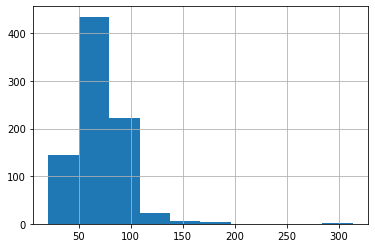

In [7]:
col = 'LotFrontage'
X_train[col].hist()

In [8]:
q1 = X_train[col].quantile(0.25)
q3 = X_train[col].quantile(0.75)
iqr = q3-q1 
q1, q3, iqr

(58.0, 80.0, 22.0)

In [9]:
new_val = q3 + iqr * 3
new_val

146.0

# Fill the missing data

In [10]:
X_train_filled = X_train.copy()
X_train_filled[col] = X_train[col].fillna(new_val)

Text(0.5, 1.0, 'LotFrontage')

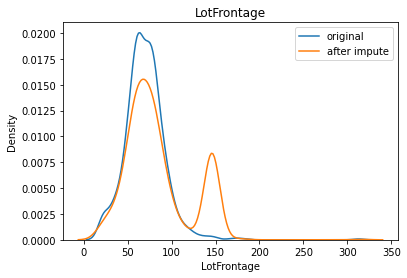

In [11]:
sns.kdeplot(X_train[col])
sns.kdeplot(X_train_filled[col])
plt.legend(['original', 'after impute'])
plt.title(col)